# ДЗ 2 по курсу регрессий

Подготовил: Кирюхов Григорий БВСН221

## Задание 1

In [147]:
import pandas as pd 

df = pd.read_stata('hwdata.dta')
df

,masterid,afreq,province,uezd,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist
0,1,0.076923,Arkhangel'sk,Arkhangel'skii,0.000350,1.068309,0.253614,9.912397,10.930694,1.0,0.235793,1.0,1.296864
1,2,0.000000,Arkhangel'sk,Kemskii,0.000000,1.282394,0.233523,7.696213,10.438284,0.0,0.235452,1.0,1.143626
2,3,NaN,Arkhangel'sk,Kol'skii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.000000,Arkhangel'sk,Mezenskii,0.000000,1.320864,0.182332,7.465655,10.640317,0.0,0.217753,1.0,0.871011
4,5,0.000000,Arkhangel'sk,Onezhskii,0.000032,0.886230,0.206245,7.507690,10.382637,0.0,0.235530,1.0,1.207089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,513,0.461538,Zemlia voiska donskogo,Rostovskii,NaN,1.004734,0.783462,9.791661,11.598011,0.0,NaN,1.0,NaN
500,514,0.000000,Zemlia voiska donskogo,Sal'skii,NaN,1.050756,0.608183,NaN,NaN,0.0,NaN,1.0,NaN
501,515,0.000000,Zemlia voiska donskogo,Taganrogskii,NaN,0.905405,0.974946,9.826390,10.486736,0.0,NaN,1.0,NaN
502,516,0.000000,Zemlia voiska donskogo,Ust'-Medveditskii,0.149596,0.784714,0.805769,0.000000,12.165553,0.0,0.205883,0.0,0.870146


Создайте переменную zemstvo посредством перекодирования nozemstvo
таким образом, чтобы единицей обозначались уезды тех губерний, в
которых в результате реформы 1864 г. земства были созданы, нулем –
наоборот, уезды тех губерний, в которых земства не были созданы.

In [148]:
df['zemstvo'] = df['nozemstvo'].apply(lambda x: 0 if x == 1.0 else 1 if x == 0.0 else None)
df['zemstvo']

0      0.0
1      0.0
2      NaN
3      0.0
4      0.0
      ... 
499    0.0
500    0.0
501    0.0
502    1.0
503    1.0
Name: zemstvo, Length: 504, dtype: float64

Визуализируйте взаимосвязь изменения в количестве сельских школ
на душу населения (ch_schools_pc – по оси ординат) и доли лет, в которые были зафиксированы крестьянские выступления (afreq – по оси
абсцисс), в разных группах, а именно сформированные по признаку
«наличие земства» и «отсутствие земства». Сделайте предварительный вывод на основе указанного графика.

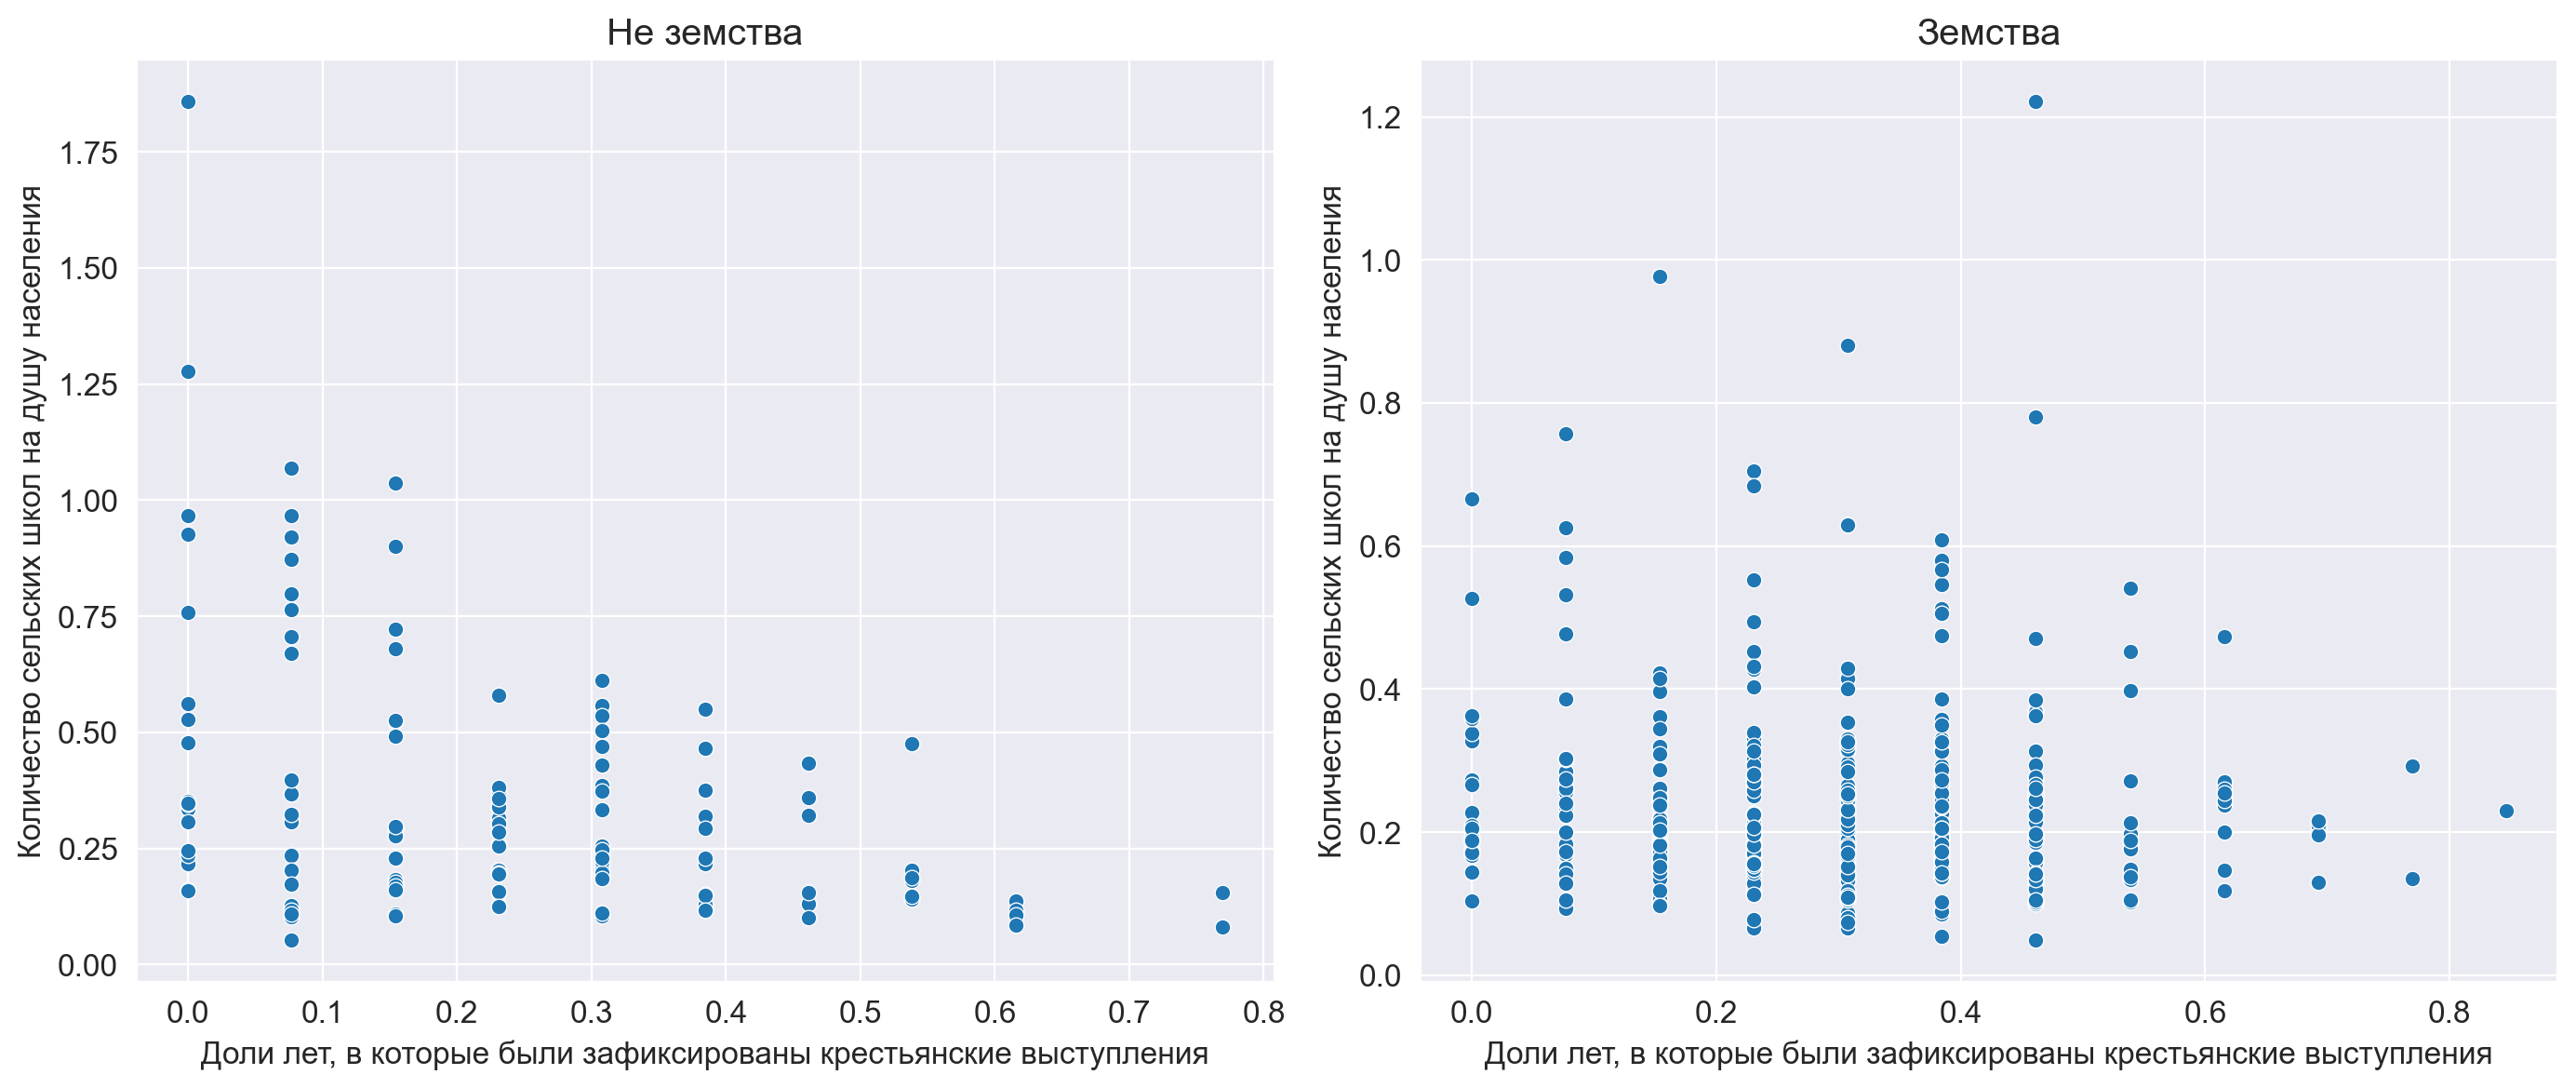

In [149]:
# Делаем красоту
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

# Выбираем значения для не земств
X_1, Y_1 = df[df['zemstvo'] == 0.0]['afreq'], df[df['zemstvo'] == 0.0]['ch_schools_pc']


# Выбираем значения для земств
X_2, Y_2 = df[df['zemstvo'] == 1.0]['afreq'], df[df['zemstvo'] == 1.0]['ch_schools_pc']


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Не земства
sns.scatterplot(x=X_1, y=Y_1, ax=axes[0])
axes[0].set_title("Не земства")
axes[0].set_xlabel("Доли лет, в которые были зафиксированы крестьянские выступления")
axes[0].set_ylabel("Количество сельских школ на душу населения")

# Земства
sns.scatterplot(x=X_2, y=Y_2, ax=axes[1])
axes[1].set_title("Земства")
axes[1].set_xlabel("Доли лет, в которые были зафиксированы крестьянские выступления")
axes[1].set_ylabel("Количество сельских школ на душу населения")

plt.tight_layout()
plt.show()


Не земства: можно заметить некоторое снижение количества школ при увеличении доли крестьянских выступлений, хотя график показывает разброс значений без четкого тренда.

Земства:  можно заметить более равномерное распределение точек, однако некоторые точки показывают значения, близкие к нулю, при разных уровнях крестьянских выступлений.

В обоих случаях можно предположить гетерескидостичность.

In [150]:
df.describe()

,masterid,afreq,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist,zemstvo
count,504.000000,500.000000,496.000000,500.000000,500.000000,491.000000,491.000000,500.0000,496.000000,500.000000,496.000000,500.000000
mean,260.359127,0.278154,0.384654,0.640294,0.450958,8.730187,11.619652,0.1000,0.274334,0.270000,1.264495,0.730000
std,148.713582,0.169759,0.250105,0.321344,0.389598,1.302431,0.477882,0.3003,0.192868,0.444404,1.112368,0.444404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.488956,0.0000,0.049276,0.000000,0.197106,0.000000
25%,132.750000,0.153846,0.142125,0.392369,0.063637,8.158945,11.367603,0.0000,0.160365,0.000000,0.725592,0.000000
50%,260.500000,0.307692,0.429770,0.629033,0.314497,8.759982,11.648208,0.0000,0.218392,0.000000,0.945298,1.000000
75%,387.250000,0.384615,0.593919,0.869572,0.864854,9.358948,11.897823,0.0000,0.315745,1.000000,1.398123,1.000000
max,517.000000,0.846154,0.852121,1.697391,1.000000,13.198354,13.305210,1.0000,1.858114,1.000000,13.619979,1.000000


Далее оцените соответствующую спецификацию регрессионной модели, которая позволяет протестировать различия во взаимосвязи изменения в количестве сельских школ на душу населения (зависимая
переменная) и доли лет, в которые были зафиксированы крестьянские
выступления, в зависимости от наличия земства, для начала без контрольных переменных. До оценивания регрессионной модели приведите описательные статистики по необходимым переменным и объясните, почему преварительные описательные статистики имеют особую
важность в контексте регрессионного анализа с переменными взаимодействия. Если считаете нужным, предложите возможные преобразования предикторов для более удобной интерпретации и примените их
при оценивании модели. Проинтерпретируйте все оценки коэффициентов в регрессионной модели (как с точки зрения характера связи,так и с точки зрения значимости).

In [151]:
variables = ['ch_schools_pc', 'afreq', 'zemstvo']

desc_stats = df[variables].describe()

correlation_matrix = df[variables].corr()
correlation_matrix

,ch_schools_pc,afreq,zemstvo
ch_schools_pc,1.000000,-0.221611,-0.257393
afreq,-0.221611,1.000000,0.174012
zemstvo,-0.257393,0.174012,1.000000


Переменные слабо сколерированы друг с другом $ |x| < 0.25$, поэтому мультиколениарность слабая

In [152]:
desc_stats

,ch_schools_pc,afreq,zemstvo
count,496.000000,500.000000,500.000000
mean,0.274334,0.278154,0.730000
std,0.192868,0.169759,0.444404
min,0.049276,0.000000,0.000000
25%,0.160365,0.153846,0.000000
50%,0.218392,0.307692,1.000000
75%,0.315745,0.384615,1.000000
max,1.858114,0.846154,1.000000


Тут мы видим  что для переменной ch_schools_pc, неполный набор данных, давайте посмотрим на эти данные.

In [153]:
df[df['ch_schools_pc'].isna()]

,masterid,afreq,province,uezd,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist,zemstvo
2,3,NaN,Arkhangel'sk,Kol'skii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0.000000,Arkhangel'sk,Pechorskii,0.0,1.697391,0.148268,NaN,NaN,0.0,NaN,1.0,NaN,0.0
22,26,NaN,Bessarabia,Iasskii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,50,NaN,Ekaterinoslav',Rostovskii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,461,NaN,Vitebsk,Surazhskii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,513,0.461538,Zemlia voiska donskogo,Rostovskii,NaN,1.004734,0.783462,9.791661,11.598011,0.0,NaN,1.0,NaN,0.0
500,514,0.000000,Zemlia voiska donskogo,Sal'skii,NaN,1.050756,0.608183,NaN,NaN,0.0,NaN,1.0,NaN,0.0
501,515,0.000000,Zemlia voiska donskogo,Taganrogskii,NaN,0.905405,0.974946,9.826390,10.486736,0.0,NaN,1.0,NaN,0.0


Тут в целом полезные значения, предлагаю заменить на средние

In [154]:
df['ch_schools_pc'].fillna(df['ch_schools_pc'].mean(), inplace=True)

In [155]:
df[df['zemstvo'].isna()]

,masterid,afreq,province,uezd,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist,zemstvo
2,3,NaN,Arkhangel'sk,Kol'skii,NaN,NaN,NaN,NaN,NaN,NaN,0.274334,NaN,NaN,NaN
22,26,NaN,Bessarabia,Iasskii,NaN,NaN,NaN,NaN,NaN,NaN,0.274334,NaN,NaN,NaN
46,50,NaN,Ekaterinoslav',Rostovskii,NaN,NaN,NaN,NaN,NaN,NaN,0.274334,NaN,NaN,NaN
447,461,NaN,Vitebsk,Surazhskii,NaN,NaN,NaN,NaN,NaN,NaN,0.274334,NaN,NaN,NaN


Тут мы видим, что есть значения где нет инфы, предлагаю их выбросить из дольнейшего анализа

In [156]:
df.dropna(subset=['zemstvo'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,masterid,afreq,province,uezd,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist,zemstvo
0,1,0.076923,Arkhangel'sk,Arkhangel'skii,0.000350,1.068309,0.253614,9.912397,10.930694,1.0,0.235793,1.0,1.296864,0.0
1,2,0.000000,Arkhangel'sk,Kemskii,0.000000,1.282394,0.233523,7.696213,10.438284,0.0,0.235452,1.0,1.143626,0.0
2,4,0.000000,Arkhangel'sk,Mezenskii,0.000000,1.320864,0.182332,7.465655,10.640317,0.0,0.217753,1.0,0.871011,0.0
3,5,0.000000,Arkhangel'sk,Onezhskii,0.000032,0.886230,0.206245,7.507690,10.382637,0.0,0.235530,1.0,1.207089,0.0
4,6,0.000000,Arkhangel'sk,Pechorskii,0.000000,1.697391,0.148268,NaN,NaN,0.0,0.274334,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,513,0.461538,Zemlia voiska donskogo,Rostovskii,NaN,1.004734,0.783462,9.791661,11.598011,0.0,0.274334,1.0,NaN,0.0
496,514,0.000000,Zemlia voiska donskogo,Sal'skii,NaN,1.050756,0.608183,NaN,NaN,0.0,0.274334,1.0,NaN,0.0
497,515,0.000000,Zemlia voiska donskogo,Taganrogskii,NaN,0.905405,0.974946,9.826390,10.486736,0.0,0.274334,1.0,NaN,0.0
498,516,0.000000,Zemlia voiska donskogo,Ust'-Medveditskii,0.149596,0.784714,0.805769,0.000000,12.165553,0.0,0.205883,0.0,0.870146,1.0


In [157]:
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import outlier_test
import numpy as np 

m1 = smf.ols(formula= 'ch_schools_pc ~ afreq + zemstvo + afreq * zemstvo', data=df).fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:          ch_schools_pc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     26.53
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           6.30e-16
Time:                        23:36:07   Log-Likelihood:                 153.12
No. Observations:                 500   AIC:                            -298.2
Df Residuals:                     496   BIC:                            -281.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4813      0.025     19.297

- afreq = -0.5517 значим и показывает, что в среднем увеличение доли лет с крестьянскими выступлениями на 1 приводит к снижению изменения количества школ на душу населения на 0.5517 (при наличии земства). То есть крестьянские выступления негативно влияют на рост сельских школ.

- zemstvo = -0.2232 значим и показывает, что в уездах, где земство отсутствует, наблюдается снижение в изменении количества школ на 0.2232 по сравнению с уездами, где земства были.

- afreq:zemstvo: = 0.5061 значим и показывает, что в уездах, где земство отсутствует, эффект крестьянских выступлений на изменение количества школ смягчается (становится менее негативным).

- $R^2 = 0.138$ говорит о том, что модель объясняет около $14\%$ вариации зависимой переменной. Это низкое значение, что может указывать на необходимость добавления других предикторов в модель для повышения ее объясняющей способности. Ну собствено это и требуется в след задании

Но тут Omnibus = 285.559, Prob(Omnibus) = 0.000 показывают о ненормальности распределения остатков, значит нам нужно как-то поребразовать переменные.

Давайте проведем Тест Пагана для оценки гетероскедостичности (необходиомсть в этом была видно еще на графиках)

In [158]:
df['afreq_nozemstvo'] = df['afreq'] * df['nozemstvo']

model = smf.ols(formula='ch_schools_pc ~ afreq + nozemstvo + afreq_nozemstvo', data=df).fit()

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

"""

Из документации het_breuschpagan

"""
# lm : float
# lagrange multiplier statistic

# lm_pvalue : float
# p-value of lagrange multiplier test

# fvalue : float
# f-statistic of the hypothesis that the error variance does not depend on x

# f_pvalue : float
# p-value for the f-statistic 

labels = ['lm', 'lm_pvalue', 'f-statistic', 'f_pvalue']

print(labels)
print(bp_test)


['lm', 'lm_pvalue', 'f-statistic', 'f_pvalue']
(40.336267947519374, 9.0421342273139e-09, 14.508278919922427, 4.507501128992104e-09)


Тест Бройша-Пагана показал наличие гетероскедастичности, что означает, что остатки модели не имеют постоянную дисперсию. (из графиков было тоже видно это). Это может влиять на корректность оценок стандартных ошибок коэффициентов, что в свою очередь может привести к неверным выводам о значимости предикторов.



Давайте как на паре добавим робастные стаднартные ошибки.

In [159]:
m1_1 = smf.ols(formula = "ch_schools_pc ~ afreq + zemstvo + afreq * zemstvo", data = df).fit(cov_type = "HC3")
print(m1_1.summary())

                            OLS Regression Results                            
Dep. Variable:          ch_schools_pc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.599
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.42e-05
Time:                        23:36:07   Log-Likelihood:                 153.12
No. Observations:                 500   AIC:                            -298.2
Df Residuals:                     496   BIC:                            -281.4
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4813      0.047     10.167

Значимости сохранились для всех переменных.

Добавьте в регрессионную модель контрольные переменные (добавьте оставшиеся переменные из таблицы с описанием показателей). Изменились ли значимым образом результаты? Соотносятся ли результаты с предположением авторов о характере взаимного влияния Земской реформы и крестьянских выступлений?


Давайте добавим пожалуй контрольные переменные с учетом всех поправок выше. 

In [160]:
df.columns

Index(['masterid', 'afreq', 'province', 'uezd', 'serfperc1', 'distance_moscow',
       'goodsoil', 'lnurban', 'lnpopn', 'province_capital', 'ch_schools_pc',
       'nozemstvo', 'redist', 'zemstvo', 'afreq_nozemstvo'],
      dtype='object')

In [161]:
m2= smf.ols(formula = "ch_schools_pc ~ afreq +zemstvo + afreq * zemstvo + distance_moscow + goodsoil + lnurban + lnpopn +province_capital", data = df).fit(cov_type = "HC3")
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:          ch_schools_pc   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     4.079
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           0.000102
Time:                        23:36:07   Log-Likelihood:                 164.24
No. Observations:                 491   AIC:                            -310.5
Df Residuals:                     482   BIC:                            -272.7
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7354      0.314  

### Коэффициенты модели:

$Intercept = 0.7354$ значимо показывает, что среднее изменение количества сельских школ на душу населения составляет 0.7354, если все предикторы принимают значение 0.


$afreq = -0.4979$ значимо показывает, что увеличение доли лет с крестьянскими выступлениями связано с уменьшением количества школ на душу населения на 0.4979.


$zemstvo = -0.1939$ значимо показывает, что уезды без земства в среднем имеют на $0.1939$ меньшее изменение количества школ по сравнению с уездами, где земства были введены.


$afreq:zemstvo = 0.4589$  значимо показываетт, что в уездах без земства негативное влияние крестьянских выступлений смягчается.

$distance_{moscow} = -0.0015$ крайне мал и не является статистически значимым, что указывает на то, что расстояние до Москвы не оказывает влияния на изменение количества сельских школ.

$goodsoil= -0.0239$ также не является статистически значимым, что свидетельствует о слабой связи между плодородностью почвы и изменениями в количестве школ.


$lnurban = 0.0107$ положителен и значим (p-значение 0.030). Это говорит о том, что уезды с более высоким городским населением имеют небольшое увеличение в изменении количества школ.

$lnpopn = -0.0317$ не является статистически значимым 

$province_{capital} = 0.0415$ указывает на положительное влияние, но результат не является значимым

### Качество модели:

$R^2 = 0.13$  указывает на то, что модель обясняет мало вариации и добавление контрольных переменных не увеличило обьяснительную силу моделей.

$F_{stat} = 4.079$ и $p_{value} = 0.000102$ показывают, что модель в целом значима.

Основные выводы:

Взаимодействие между крестьянскими выступлениями и земством: Это взаимодействие остается статистически значимым, и уезды без земства демонстрируют смягчение негативного влияния крестьянских выступлений на изменение количества сельских школ.

Контрольные переменные: Некоторые переменные, такие как логарифм городского населения (lnurban), оказались статистически значимыми, что говорит о важности уровня урбанизации. Другие переменные, такие как расстояние до Москвы и плодородность почвы, оказались незначимыми, что может указывать на их слабое влияние в данной модели.

## Задание 2

Оцените регрессионную модель, в которой тестируется взаимный эффект показателя плодородности почвы (goodsoil ) и логарифмагородского населения уезда на 1863 г. (lnurban) на изменение в количестве сельских школ на душу населения. Остальные показатели из таблицы
с описанием переменных используйте как контрольные. Как изменяется
предельный эффект плодородности почвы и его значимость в зависимости
от «условия» (показателя городского населения)? Приведите необходимые
расчеты и представьте соответствующий график зависимости предельного
эффекта goodsoil на ch_school_pc. Проинтерпретируйте как предельный
эффект, так и его значимость.

In [162]:
m3 = smf.ols(formula="ch_schools_pc ~ goodsoil * lnurban + afreq + zemstvo + distance_moscow + lnpopn + province_capital", data=df).fit()

print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:          ch_schools_pc   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     6.757
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.06e-08
Time:                        23:36:07   Log-Likelihood:                 154.90
No. Observations:                 491   AIC:                            -291.8
Df Residuals:                     482   BIC:                            -254.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7681      0.223  

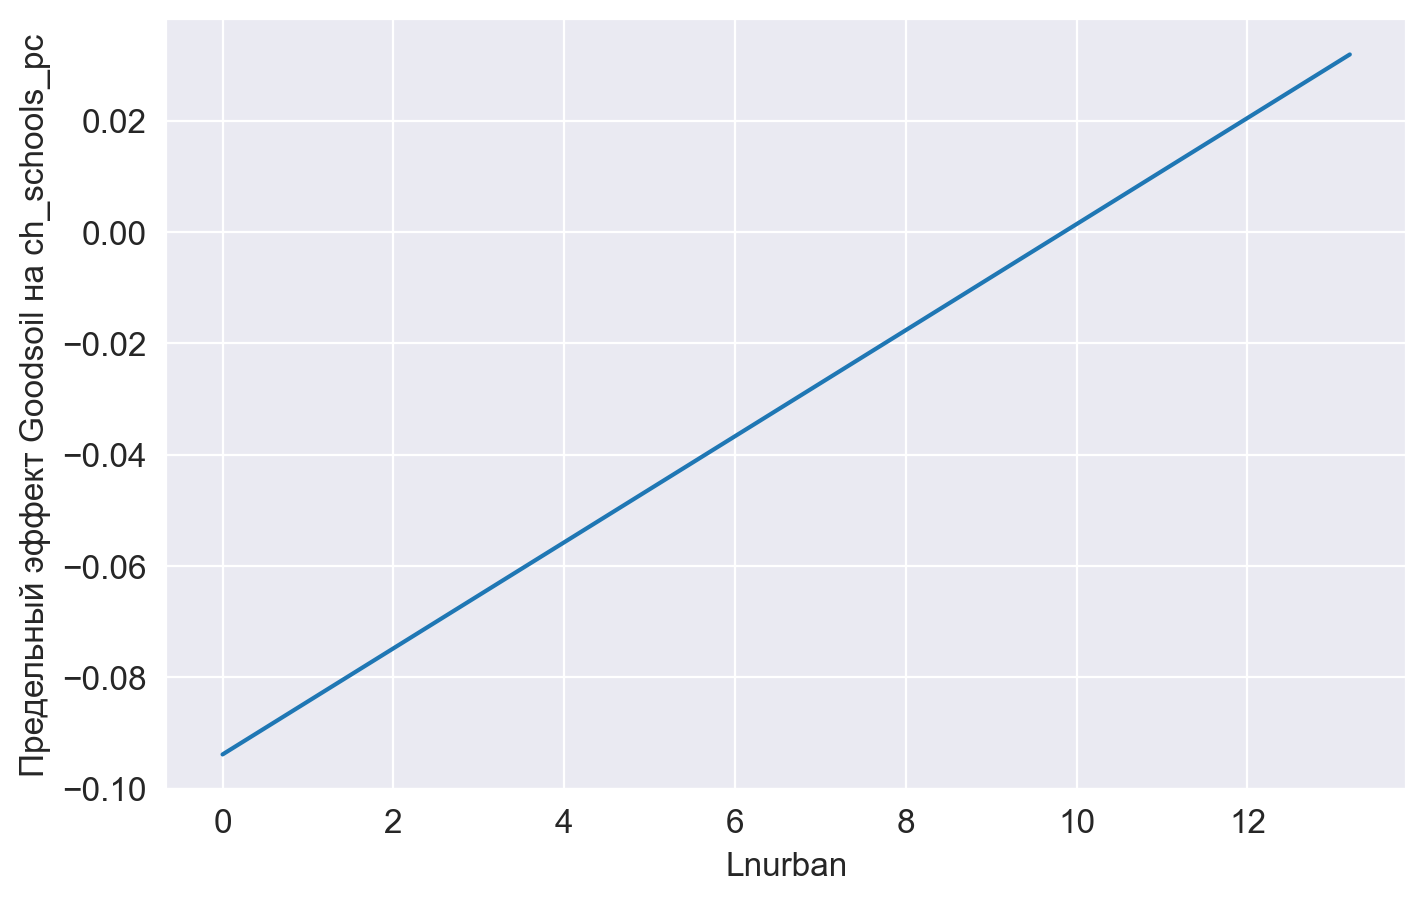

In [163]:
lnurban_vals = np.linspace(df['lnurban'].min(), df['lnurban'].max(), 100)

marginal_effect_goodsoil = m3.params['goodsoil'] + m3.params['goodsoil:lnurban'] * lnurban_vals

plt.plot(lnurban_vals, marginal_effect_goodsoil, label='Marginal Effect of Goodsoil')
plt.xlabel('Lnurban')
plt.ylabel('Предельный эффект Goodsoil на ch_schools_pc')
plt.show()

Хотя график показывает тренд, где предельный эффект goodsoil изменяется в зависимости от уровня урбанизации, этот эффект не является статистически значимым. Это говорит о том, что на основе данных, с которыми мы работаем, нельзя с уверенностью утверждать, что такие изменения в предельном эффекте происходят на практике.

## Задание 3

Исходя из статьи можно выделить несколько важных критик этой домашней работы: 

Линейная взаимосвязь: мы предполагаем линейную взаимосвязь между переменными взаимодейсвтия, однко авторы статьи отмечают, что чаще всего они имеют неленейный характер. К примеру в наших моделях goodsoil и lnurban, взаимодействует линейно. Но по результатам регрессии, взаимодействие не является значимым, хотя интутивно кажется, что взаимодейсвтие должно быть значимым.
